In [ ]:
!pip install imbalanced-learn
import numpy as np # Sayısal hesaplamalar için temel kütüphane
import pandas as pd # Veri işleme ve CSV dosya girişi/çıkışı için
import os # Dosya ve klasör işlemleri için
from google.colab import drive # Google Drive'a erişim için
import keras # Derin öğrenme modelleri oluşturmak için
import seaborn as sns # Veri görselleştirme için
import matplotlib.pyplot as plt # Grafik çizmek için
from keras.models import Sequential # Keras'ta ardışık model için
import PIL # Görüntü işleme için Python Imaging Library (PIL) için temel kütüphane
import os
import cv2 # Görüntü işleme için OpenCV
import tensorflow as tf  # Derin öğrenme modelleri için TensorFlow
from PIL import Image # Görüntü işleme için Python Imaging Library
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D # Model katmanları için
from sklearn.preprocessing import OneHotEncoder # Etiketleri tek sıcak kodlamak için
from sklearn.model_selection import train_test_split # Eğitim ve test verilerini ayırmak için
from sklearn.preprocessing import LabelEncoder #kategorik etiketleri sayısal verilere dönüştürmek
from tensorflow import keras # Sinir ağı modellerini oluşturmak, eğitmek ve değerlendirmek
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Görüntü artırma işlemleri için
from keras.callbacks import EarlyStopping,ModelCheckpoint # Model eğitimi sırasında erken durdurma için
from sklearn.metrics import confusion_matrix  # Model değerlendirme metrikleri için
from sklearn.metrics import classification_report # Modelin performansını raporlamak için
from tqdm import tqdm # Döngülerin ilerlemesini göstermek için
from imblearn.over_sampling import SMOTE # Dengesiz veri setlerini dengelemek için


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

# Download per category
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/Data/Non_Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/Data/Very_mild_Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/Data/Mild_Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/Data/Moderate_Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

In [ ]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data')):
    subfolder_path = os.path.join('/content/drive/MyDrive/Colab_Notebooks/Data', subfolder)
    # Check if the item is a directory before iterating through it
    if os.path.isdir(subfolder_path):
        for image_filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_filename)
            images.append(image_path)
            labels.append(subfolder)  # Assign the label based on the subfolder name
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 5/5 [00:08<00:00,  1.69s/it]


,image,label
0,/content/drive/MyDrive/Colab_Notebooks/Data/Mi...,Mild_Dementia
1,/content/drive/MyDrive/Colab_Notebooks/Data/Mi...,Mild_Dementia
2,/content/drive/MyDrive/Colab_Notebooks/Data/Mi...,Mild_Dementia
3,/content/drive/MyDrive/Colab_Notebooks/Data/Mi...,Mild_Dementia
4,/content/drive/MyDrive/Colab_Notebooks/Data/Mi...,Mild_Dementia
...,...,...
86432,/content/drive/MyDrive/Colab_Notebooks/Data/Ve...,Very_mild_Dementia
86433,/content/drive/MyDrive/Colab_Notebooks/Data/Ve...,Very_mild_Dementia
86434,/content/drive/MyDrive/Colab_Notebooks/Data/Ve...,Very_mild_Dementia
86435,/content/drive/MyDrive/Colab_Notebooks/Data/Ve...,Very_mild_Dementia


<ipython-input-12-d1e4fe8ee496>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set1')


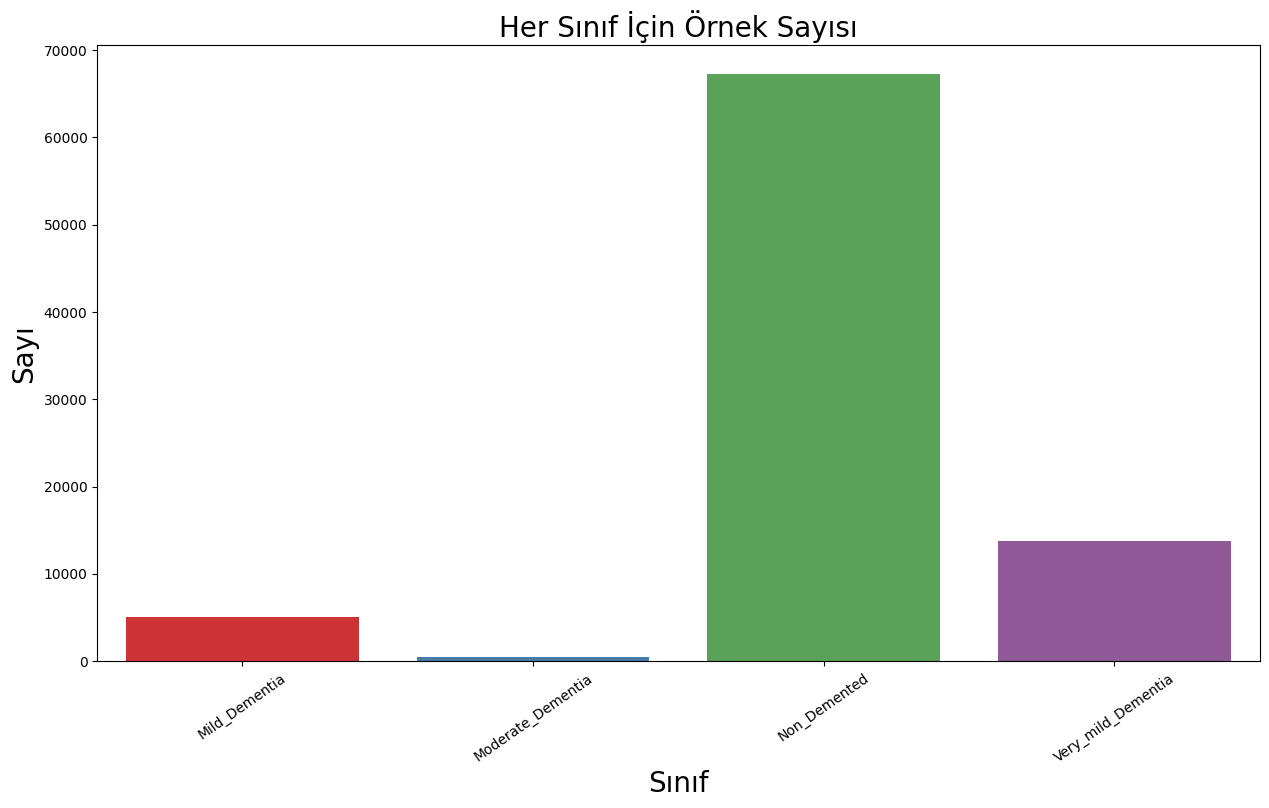

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Sınıf",fontsize=20)
ax.set_ylabel("Sayı",fontsize=20)
plt.title('Her Sınıf İçin Örnek Sayısı',fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)
plt.show()

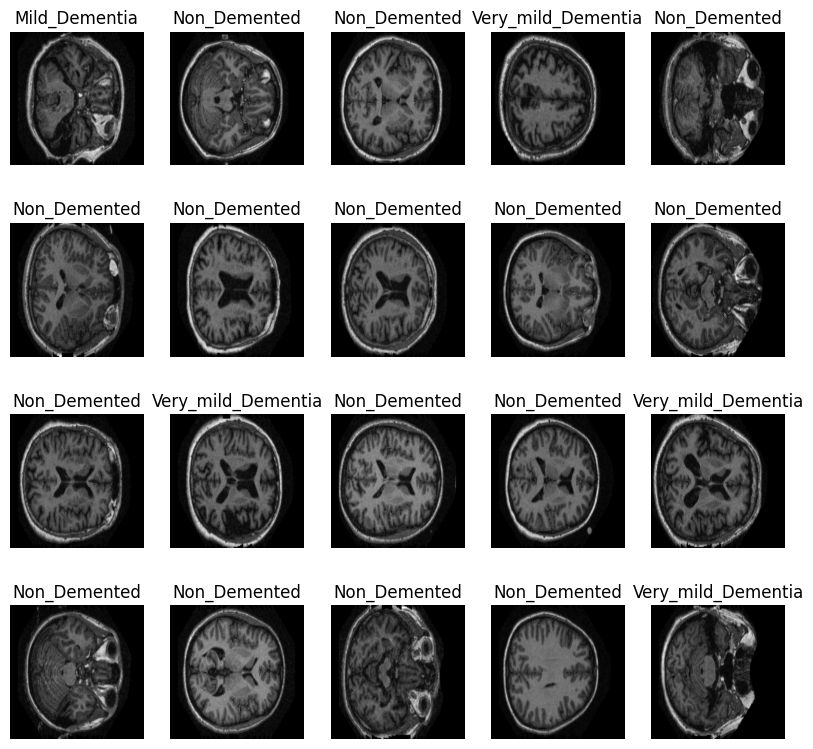

In [ ]:
plt.figure(figsize=(10,12))
for n,i in enumerate(np.random.randint(0,len(df),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=12)

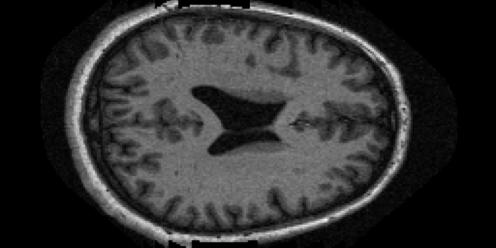

In [ ]:
PIL.Image.open(str(non_demented[0]))

In [ ]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

67222
5002
488
13725


In [ ]:
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [ ]:
data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for s in mild_demented
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for s in moderate_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for s in very_mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [74]:
X=np.array(data)

In [75]:
X.shape

(86437, 128, 128, 3)

In [76]:
y=np.array(result)
y=y.reshape(X.shape[0],4)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

In [78]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42, shuffle = True)

In [79]:
X_train.shape

(69149, 128, 128, 3)

In [80]:
X_test.shape

(17288, 128, 128, 3)

In [81]:
model=Sequential()

In [82]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',input_shape = (128,128,3)))

In [84]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))

In [85]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_3 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)       

In [86]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [87]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [89]:
history= model.fit(X_train,y_train, validation_split=0.2,epochs=10,callbacks=[early_stopping],batch_size=128)

Epoch 1/10
433/433 [==============================] - 481s 1s/step - loss: 0.8214 - accuracy: 0.7992 - val_loss: 0.3478 - val_accuracy: 0.8518
Epoch 2/10
433/433 [==============================] - 475s 1s/step - loss: 0.2718 - accuracy: 0.8848 - val_loss: 0.1367 - val_accuracy: 0.9467
Epoch 3/10
433/433 [==============================] - 478s 1s/step - loss: 0.1654 - accuracy: 0.9298 - val_loss: 0.0569 - val_accuracy: 0.9812
Epoch 4/10
433/433 [==============================] - 479s 1s/step - loss: 0.1199 - accuracy: 0.9489 - val_loss: 0.0418 - val_accuracy: 0.9837
Epoch 5/10
433/433 [==============================] - 476s 1s/step - loss: 0.0922 - accuracy: 0.9630 - val_loss: 0.0780 - val_accuracy: 0.9764
Epoch 6/10
433/433 [==============================] - 473s 1s/step - loss: 0.0764 - accuracy: 0.9707 - val_loss: 0.0760 - val_accuracy: 0.9814
Epoch 7/10
433/433 [==============================] - 472s 1s/step - loss: 0.0655 - accuracy: 0.9751 - val_loss: 0.0523 - val_accuracy: 0.9839

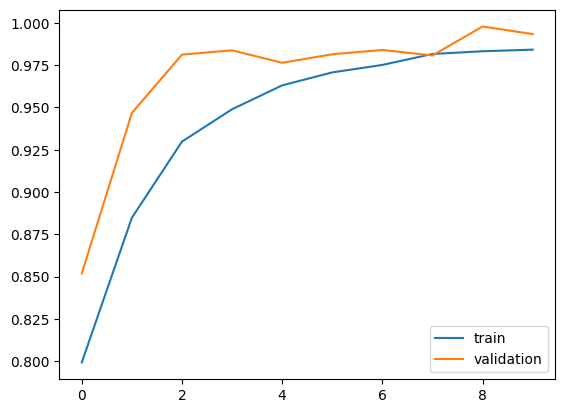

In [90]:
%matplotlib inline
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

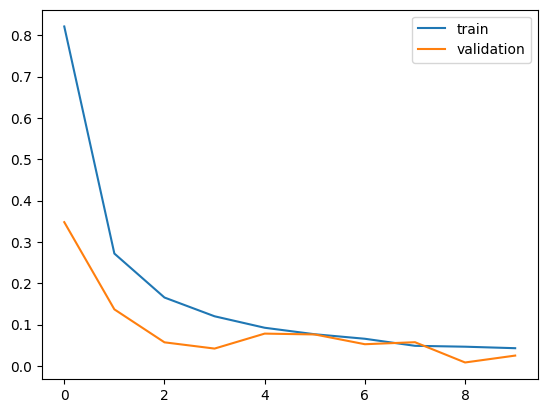

In [91]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [92]:
#classes names
class_name = {0: "Mild Dementia",1: "Moderate Dementia" , 2: "Non Demented", 3: "Very mild Dementia"}

In [93]:
test_scores = model.evaluate(X_test,y_test)
test_scores

541/541 [==============================] - 40s 74ms/step - loss: 0.0204 - accuracy: 0.9935


[0.02042829617857933, 0.9934636950492859]

In [94]:
predicted_test_labels = model.predict(X_test)
res = model.predict(X_test)
predicted_test_labels =  np.argmax(predicted_test_labels,axis= 1 )
predicted_test_labels[1]

541/541 [==============================] - 37s 69ms/step


0

In [97]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [98]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

accuracy_score(y_test,ypred)

0.9934636742248959

<Figure size 640x480 with 0 Axes>

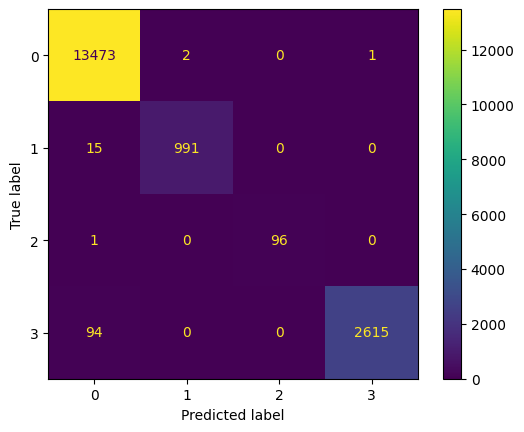

In [99]:
cf = confusion_matrix(y_true = y_test ,y_pred =  ypred)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# ax = sns.heatmap(cf, cmap='Blues', annot=True, fmt='d', xticklabels=class_name, yticklabels=class_name)

# plt.title('Alzheimer\'s Disease Diagnosis')
# plt.xlabel('Prediction')
# plt.ylabel('Truth')
# plt.show(ax)


x = ConfusionMatrixDisplay(cf)
x.plot()

In [100]:
print(classification_report(y_true = y_test ,y_pred =  ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13476
           1       1.00      0.99      0.99      1006
           2       1.00      0.99      0.99        97
           3       1.00      0.97      0.98      2709

    accuracy                           0.99     17288
   macro avg       1.00      0.98      0.99     17288
weighted avg       0.99      0.99      0.99     17288



In [101]:
model.save('/content/drive/MyDrive/Colab_Notebooks/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [131]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Alzheimer riski aralıklarına göre tanımlar
risk_levels = [
    (0, 30, "Dementia riski yok"),
    (30, 50, "Very Mild Dementia"),
    (50, 70, "Mild Dementia"),
    (70, 100, "Moderate Dementia")
]

# Sonuçları dosyaya yazdıran fonksiyon
def save_results_to_file(results, output_file='results.txt'):
    with open(output_file, 'w') as f:
        for result in results:
            f.write(f"{result['file']}: Alzheimer riski % {result['risk']:.2f}\n")
        f.write(f"\nOrtalama Alzheimer riski: % {np.mean([res['risk'] for res in results]):.2f}\n")

        risk_counts = {message: 0 for _, _, message in risk_levels}

        for res in results:
            for min_val, max_val, message in risk_levels:
                if min_val <= res['risk'] < max_val:
                    risk_counts[message] += 1
                    break

        # Çoğunluk sınıfı seç
        final_result = max(risk_counts, key=risk_counts.get)
        f.write(f"Sonuç: {final_result}\n")

# Görselleri analiz eden fonksiyon (ortalama hesaplama dahil)
def analyze_folder_images(folder_path, model):
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        print("Bu klasörde görüntü dosyası bulunamadı.")
        return

    results = []

    for image_file in image_files:
        img = image.load_img(image_file, target_size=(128, 128))  # Model giriş boyutuna göre
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        prediction = model.predict(img_array)

        # Modelin tahmin ettiği sınıf olasılıklarını yazdır
        print(f"Modelin tahmin ettiği sınıf olasılıkları: {prediction[0]}")

        # Her bir sınıfın olasılıklarını normalize et
        class_probs = prediction[0] / np.sum(prediction[0])
        weighted_risk = np.sum(class_probs * np.array([30, 50, 70, 100]))  # Örnek ağırlıklandırma

        # Riski sınıflandır
        risk_category = classify_risk_level(weighted_risk)

        results.append({"file": os.path.basename(image_file), "risk": weighted_risk, "category": risk_category})
        print(f"{os.path.basename(image_file)}: Alzheimer riski % {weighted_risk:.2f} ({risk_category})")

    # Sonuçları dosyaya kaydetme
    save_results_to_file(results)

# Alzheimer riskini sınıflandırma fonksiyonu
def classify_risk_level(risk_score):
    if risk_score < 30:
        return "Non Demented"
    elif risk_score < 50:
        return "Very Mild Dementia"
    elif risk_score < 70:
        return "Mild Dementia"
    else:
        return "Moderate Dementia"

# Modeli yükleme (Eğer model yüklenmiyorsa path'i kontrol edin)
# Eğer model zaten yüklü ise bu kısmı geçebilirsiniz
model_path = '/content/drive/MyDrive/Colab_Notebooks/model.h5'
model = load_model(model_path)

# Fonksiyonu çalıştırma
folder_path = "/content/drive/MyDrive/Colab_Notebooks/test/mild_dementia_test"
analyze_folder_images(folder_path, model)


1/1 [==============================] - 0s 160ms/step
Modelin tahmin ettiği sınıf olasılıkları: [7.7446097e-30 0.0000000e+00 4.2244162e-35 1.0000000e+00]
OAS1_0028_MR1_mpr-1_160.jpg: Alzheimer riski % 100.00 (Moderate Dementia)
1/1 [==============================] - 0s 40ms/step
Modelin tahmin ettiği sınıf olasılıkları: [7.868142e-27 0.000000e+00 6.343155e-33 1.000000e+00]
OAS1_0028_MR1_mpr-1_147.jpg: Alzheimer riski % 100.00 (Moderate Dementia)
1/1 [==============================] - 0s 41ms/step
Modelin tahmin ettiği sınıf olasılıkları: [1.3369516e-26 0.0000000e+00 1.9387786e-33 1.0000000e+00]
OAS1_0028_MR1_mpr-1_146.jpg: Alzheimer riski % 100.00 (Moderate Dementia)
1/1 [==============================] - 0s 41ms/step
Modelin tahmin ettiği sınıf olasılıkları: [2.5170071e-27 0.0000000e+00 1.0748402e-34 1.0000000e+00]
OAS1_0028_MR1_mpr-1_145.jpg: Alzheimer riski % 100.00 (Moderate Dementia)
1/1 [==============================] - 0s 41ms/step
Modelin tahmin ettiği sınıf olasılıkları: [1.46